In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import random

data = pd.read_json("7postElection.json")
print(len(data))
data.columns


Using TensorFlow backend.


6942


Index(['favorite_count', 'in_reply_to_user_id_str', 'is_retweet',
       'retweet_count', 'text', 'month', 'year', 'hour', 'week_year', 'date',
       'modded_text', 'modded1', 'noTags_punct', 'modded1_stemmed', 'labels'],
      dtype='object')

In [2]:
data = data[data["is_retweet"] == False] 
print(len(data))


5926


In [3]:
#remove links
data["modded1"] = data["text"].str.replace("http\S+"," ")

data["modded1"] = data["modded1"].str.replace("\n", " ")

#remove punctuation
data['modded1'] = data["modded1"].str.replace("[^\w\s]"," ")
data["modded1"] = data["modded1"].str.lower()
data["modded1"]

30192    to all americans   happynewyear  amp  many ble...
30198    well  the new year begins  we will  together  ...
30199    chicago murder rate is record setting   4 331 ...
30200     cnn just released a book called  unprecedente...
30201    various media outlets and pundits say that i t...
30202    i thought and felt i would win big  easily ove...
30203    north korea just stated that it is in the fina...
30204    china has been taking out massive amounts of m...
30205    general motors is sending mexican made model o...
30206    people must remember that obamacare just doesn...
30207    the democrat governor of minnesota said  the a...
30208    with all that congress has to work on  do they...
30209            may be  their number one act and prior...
30210      danscavino  ford to scrap mexico plant  inve...
30211    instead of driving jobs and wealth away  ameri...
30212    there should be no further releases from gitmo...
30213     trump is already delivering the jobs he promi.

In [4]:
sentences = data["modded1"].tolist()[:500]
list_train_set = sentences

In [5]:
fullText = " ".join(sentences)
text_in_words = [w for w in fullText.split(' ') if w.strip() != '' or w == '\n']
text_in_words = list(map(lambda s: s.strip(), text_in_words))

print('Corpus length in words:', len(text_in_words))

from collections import Counter
word_freq = dict(Counter(fullText.split()))

not_freq = [x for x in word_freq if word_freq[x] < 19] 

shorter = []
for sentence in sentences:
    t = sentence.split()
    q = sentence
    for el in t:
        if el in not_freq:
            q = q.replace(el," ")
    if q != []:
        shorter.append([q])
        
unique = len(word_freq.keys())-len(not_freq)
print("words", len(word_freq.keys()))
print("not frequent", len(not_freq))
print("remaining", len(word_freq.keys())-len(not_freq))


Corpus length in words: 9901
words 2211
not frequent 2130
remaining 81


In [6]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()

vocab = Counter(fullText.split())
#print(vocab)

corpus = [x.split() for x in sentences]
#corpus

In [7]:
from gensim.models import Word2Vec


w2vec_size = 200
w2 = Word2Vec(corpus, size=w2vec_size, window=10, min_count=1,sg=1)


In [8]:
word_vectors = w2.wv
print("Number of word vectors: {}".format(len(word_vectors.vocab)))
w2.wv.most_similar(positive=['hillary'])


Number of word vectors: 2211


[('deal', 0.9998354911804199),
 ('nbc', 0.9998315572738647),
 ('democrats', 0.9998230338096619),
 ('put', 0.9998217821121216),
 ('or', 0.9998217821121216),
 ('come', 0.99982088804245),
 ('terrible', 0.9998208284378052),
 ('its', 0.9998205900192261),
 ('him', 0.999819278717041),
 ('nothing', 0.9998186826705933)]

In [9]:
MAX_NB_WORDS = len(word_vectors.vocab)
MAX_SEQUENCE_LENGTH = 100

In [10]:
from keras.preprocessing.sequence import pad_sequences
import keras.utils as ku


word_index = {t[0]: i+1 for i,t in enumerate(vocab.most_common(MAX_NB_WORDS))}
#print(word_index)
sequences = [[word_index[t] for t in sent.split()] for sent in sentences[:len(list_train_set)]]
test_sequences = [[word_index[t]  for t in sent.split()] for sent in sentences[len(list_train_set):]]


In [12]:
word_index

{'the': 1,
 'to': 2,
 'and': 3,
 'a': 4,
 'of': 5,
 'in': 6,
 'is': 7,
 'for': 8,
 'will': 9,
 'with': 10,
 'it': 11,
 'great': 12,
 'on': 13,
 'i': 14,
 'be': 15,
 'that': 16,
 'at': 17,
 's': 18,
 'are': 19,
 'amp': 20,
 'our': 21,
 'you': 22,
 'we': 23,
 'have': 24,
 'by': 25,
 'not': 26,
 'they': 27,
 'my': 28,
 'was': 29,
 'news': 30,
 'very': 31,
 'this': 32,
 'fake': 33,
 'people': 34,
 'u': 35,
 'all': 36,
 'media': 37,
 'so': 38,
 'trump': 39,
 'just': 40,
 'big': 41,
 'jobs': 42,
 'thank': 43,
 't': 44,
 'from': 45,
 'me': 46,
 'today': 47,
 'russia': 48,
 'make': 49,
 'he': 50,
 'no': 51,
 'has': 52,
 'an': 53,
 'country': 54,
 'as': 55,
 'who': 56,
 'america': 57,
 'american': 58,
 'election': 59,
 'out': 60,
 'should': 61,
 'more': 62,
 'now': 63,
 'many': 64,
 'again': 65,
 'or': 66,
 'about': 67,
 'bad': 68,
 'would': 69,
 'obamacare': 70,
 'back': 71,
 'obama': 72,
 'if': 73,
 'time': 74,
 'what': 75,
 'were': 76,
 'meeting': 77,
 'new': 78,
 'going': 79,
 'one': 80,
 '

In [13]:
tokenizer = Tokenizer()

def get_sequence_of_tokens(corpus):
    ## tokenization
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    
    ## convert data to sequence of tokens 
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1] #i+1
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

inp_sequences, total_words = get_sequence_of_tokens(corpus)
inp_sequences[:10]


[[2, 36],
 [2, 36, 293],
 [2, 36, 293, 1013],
 [2, 36, 293, 1013, 20],
 [2, 36, 293, 1013, 20, 64],
 [2, 36, 293, 1013, 20, 64, 1014],
 [2, 36, 293, 1013, 20, 64, 1014, 2],
 [2, 36, 293, 1013, 20, 64, 1014, 2, 22],
 [2, 36, 293, 1013, 20, 64, 1014, 2, 22, 36],
 [2, 36, 293, 1013, 20, 64, 1014, 2, 22, 36, 138]]

In [14]:
def generate_padded_sequences(input_sequences):
    max_sequence_len = 4
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='post'))
    predictors, lab = input_sequences[:,:-1],input_sequences[:,-1] #tolto -1
    label = ku.to_categorical(lab, num_classes=total_words)
    return predictors, label, max_sequence_len

predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)
input_len = max_sequence_len-1

#data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding="pre", truncating="post")
#data
print(predictors.shape)
label.shape

(9401, 3)


(9401, 2212)

In [15]:
print(predictors[0],predictors[1],predictors[2])

[ 2 36  0] [  2  36 293] [  2  36 293]


In [16]:
#WEIGHT MATRIX
WV_DIM = w2vec_size

nb_words = total_words
# we initialize the matrix with random numbers
wv_matrix = (np.random.rand(total_words, WV_DIM) - 0.5) / 5.0
for word, i in word_index.items():
    if i >= MAX_NB_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        # words not found in embedding index will be all-zeros.
        wv_matrix[i] = embedding_vector
    except:
        pass
print(nb_words)

2212


In [17]:
from keras.layers import Dense, Input, Embedding, Dropout,LSTM,Bidirectional
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization

In [18]:
model = Sequential()

model.add(Embedding(nb_words, w2vec_size, mask_zero=False,weights=[wv_matrix],input_length=input_len,trainable=True)) #mask zero = False
#model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Bidirectional(LSTM(50)))
model.add(Dropout(0.4))
model.add(Dense(nb_words, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 3, 200)            442400    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100)               100400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2212)              223412    
Total params: 766,212
Trainable params: 766,212
Non-trainable params: 0
_________________________________________________________________


model_json = model.to_json()
with open("2layered.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights('2layered.h5')


In [19]:
from keras.callbacks import ModelCheckpoint

filepath="postelectionGenerator-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


In [20]:
history = model.fit(predictors, label, validation_split=0.35, epochs=10, verbose=1)#callbacks=callbacks_list)
#0.40 andava bene prima  #40 epoch prima più o meno

Train on 6110 samples, validate on 3291 samples
Epoch 1/10
6110/6110 [==============================] - 8s 1ms/step - loss: 6.5930 - acc: 0.0979 - val_loss: 6.2463 - val_acc: 0.1133
Epoch 2/10
6110/6110 [==============================] - 7s 1ms/step - loss: 5.9471 - acc: 0.1013 - val_loss: 6.2637 - val_acc: 0.1136
Epoch 3/10
6110/6110 [==============================] - 7s 1ms/step - loss: 5.8151 - acc: 0.0980 - val_loss: 6.3591 - val_acc: 0.1143
Epoch 4/10
6110/6110 [==============================] - 6s 1ms/step - loss: 5.7330 - acc: 0.0972 - val_loss: 6.4518 - val_acc: 0.1143
Epoch 5/10
6110/6110 [==============================] - 4s 659us/step - loss: 5.6400 - acc: 0.1031 - val_loss: 6.5594 - val_acc: 0.1170
Epoch 6/10
6110/6110 [==============================] - 4s 640us/step - loss: 5.5288 - acc: 0.1111 - val_loss: 6.6057 - val_acc: 0.1182
Epoch 7/10
6110/6110 [==============================] - 4s 634us/step - loss: 5.4077 - acc: 0.1190 - val_loss: 6.6364 - val_acc: 0.1209
Epoch 8/

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


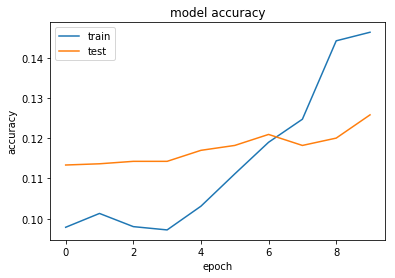

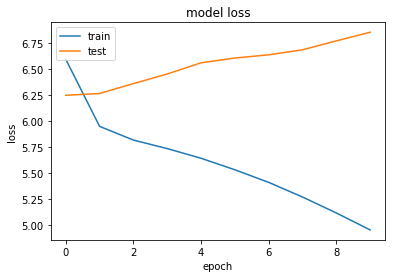

In [21]:
#history = model.fit(predictors, label, validation_split=0.40, epochs=25, verbose=1,callbacks=callbacks_list)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

import json
from keras.models import model_from_json

with open('goodGenerator200.json', 'r') as json_file:
    model = model_from_json(json_file.read())
model.load_weights("goodGenerator200.h5")


In [ ]:
print(word_index)

In [22]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    preds = []
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0] 
        token_list = pad_sequences([token_list], maxlen=input_len, padding='post') #max sequence len - 1
        predicted = model.predict_classes(token_list, verbose=0)
        preds.append(predicted)
        output_word = ""
        
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
#    print(preds)
    return seed_text.title()


In [23]:
rand = sentences
sampling = random.choices(rand, k=10)

seeds = []
for el in sampling:
    seeds.append(" ".join(el.split()[:5]))

for el in seeds:
    print("seed: \" " + el + "\"")
    t = generate_text(el, 50 , model, max_sequence_len)
    print(t + "\n")

seed: " iran is rapidly taking over"
Iran Is Rapidly Taking Over The Great The Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great

seed: " jeff sessions is an honest"
Jeff Sessions Is An Honest The Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great

seed: " danscavino ford to scrap mexico"
Danscavino Ford To Scrap Mexico And Shooting States And Border The Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And Great And

seed: " immigration ban is one of"
Immigr

In [ ]:
for sentence in sentences:
    if "Briefing" in sentence.split() and "Usedgov " in sentence.split():
        print(sentence + "\n")